In [1]:
import random 
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np  
# pandas生成的就是dataframe而numpy生成的是矩阵 
file_path = r"D:\Users\acer\Desktop\所有的文件\python资料\课件资料\1-6\数据分析资料\day05\code\IMDB-Movie-Data.csv"

In [2]:
# pandas生成的就是dataframe而numpy生成的是矩阵   
df = pd.read_csv(file_path)   
# 统计分类的列表   
print(df['Genre'].head(3))   

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: object


In [12]:
print(df['Genre'].str)  
print(df['Genre'].str.split(','))  
# 将padans读出来的二维数组的电影类型列提取出来弄成[[],[],[]]的形式  
temp_list = df['Genre'].str.split(',').tolist() 
print(temp_list)

0       [Action, Adventure, Sci-Fi]
1      [Adventure, Mystery, Sci-Fi]
2                [Horror, Thriller]
3       [Animation, Comedy, Family]
4      [Action, Adventure, Fantasy]
                   ...             
995         [Crime, Drama, Mystery]
996                        [Horror]
997         [Drama, Music, Romance]
998             [Adventure, Comedy]
999       [Comedy, Family, Fantasy]
Name: Genre, Length: 1000, dtype: object
[['Action', 'Adventure', 'Sci-Fi'], ['Adventure', 'Mystery', 'Sci-Fi'], ['Horror', 'Thriller'], ['Animation', 'Comedy', 'Family'], ['Action', 'Adventure', 'Fantasy'], ['Action', 'Adventure', 'Fantasy'], ['Comedy', 'Drama', 'Music'], ['Comedy'], ['Action', 'Adventure', 'Biography'], ['Adventure', 'Drama', 'Romance'], ['Adventure', 'Family', 'Fantasy'], ['Biography', 'Drama', 'History'], ['Action', 'Adventure', 'Sci-Fi'], ['Animation', 'Adventure', 'Comedy'], ['Action', 'Comedy', 'Drama'], ['Animation', 'Adventure', 'Comedy'], ['Biography', 'Drama', 'History'

In [4]:
# 通过set函数实现去重，因为集合中是没有重复项的， 所以用set之后，列表会变成集合，重复项剔除 
# 拥有两次循环的列表生成器  
genre_list = list(set([i for j in temp_list for i in j]))  # genre_lsit ==> 横向标签 
print(genre_list) 

['Horror', 'Sci-Fi', 'Musical', 'Music', 'Romance', 'Crime', 'Mystery', 'Sport', 'Action', 'Biography', 'War', 'History', 'Adventure', 'Comedy', 'Animation', 'Family', 'Drama', 'Western', 'Fantasy', 'Thriller']


In [5]:
# 构件全为零的数组，
# 先用numpy制作一个零矩阵，再将其变成pandas类型，也就是dataframe 
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))),columns=genre_list)# columns指定列标签 
print(zeros_df) 

     Horror  Sci-Fi  Musical  Music  Romance  Crime  Mystery  Sport  Action  \
0       0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   
1       0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   
2       0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   
3       0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   
4       0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   
..      ...     ...      ...    ...      ...    ...      ...    ...     ...   
995     0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   
996     0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   
997     0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   
998     0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   
999     0.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   

     Biography  War  History  Adventure  Comedy  An

In [6]:
#给每个电影出现分类的位置赋值1
for i in range(df.shape[0]):
    # zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
    zeros_df.loc[i, temp_list[i]] = 1   # 对zeros_df的第i行templist列进行赋值
print(zeros_df.head(3))
print(list(df))
print(list(zeros_df))    # 将dataframe类型强制转换成list类型，则会将标签生成列表，数据不管
print("=================")
print(list(df['Genre']))  # 当面对series类型时，则会将数据转换为列表

   Horror  Sci-Fi  Musical  Music  Romance  Crime  Mystery  Sport  Action  \
0     0.0     1.0      0.0    0.0      0.0    0.0      0.0    0.0     1.0   
1     0.0     1.0      0.0    0.0      0.0    0.0      1.0    0.0     0.0   
2     1.0     0.0      0.0    0.0      0.0    0.0      0.0    0.0     0.0   

   Biography  War  History  Adventure  Comedy  Animation  Family  Drama  \
0        0.0  0.0      0.0        1.0     0.0        0.0     0.0    0.0   
1        0.0  0.0      0.0        1.0     0.0        0.0     0.0    0.0   
2        0.0  0.0      0.0        0.0     0.0        0.0     0.0    0.0   

   Western  Fantasy  Thriller  
0      0.0      0.0       0.0  
1      0.0      0.0       0.0  
2      0.0      0.0       1.0  
['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']
['Horror', 'Sci-Fi', 'Musical', 'Music', 'Romance', 'Crime', 'Mystery', 'Sport', 'Action', 'Biography', 'War', 'His

[119.0, 120.0, 5.0, 16.0, 141.0, 150.0, 106.0, 18.0, 303.0, 81.0, 13.0, 29.0, 259.0, 279.0, 49.0, 51.0, 513.0, 7.0, 101.0, 195.0]


([<matplotlib.axis.YTick at 0x1815307c948>,
 <a list of 27 Text yticklabel objects>)

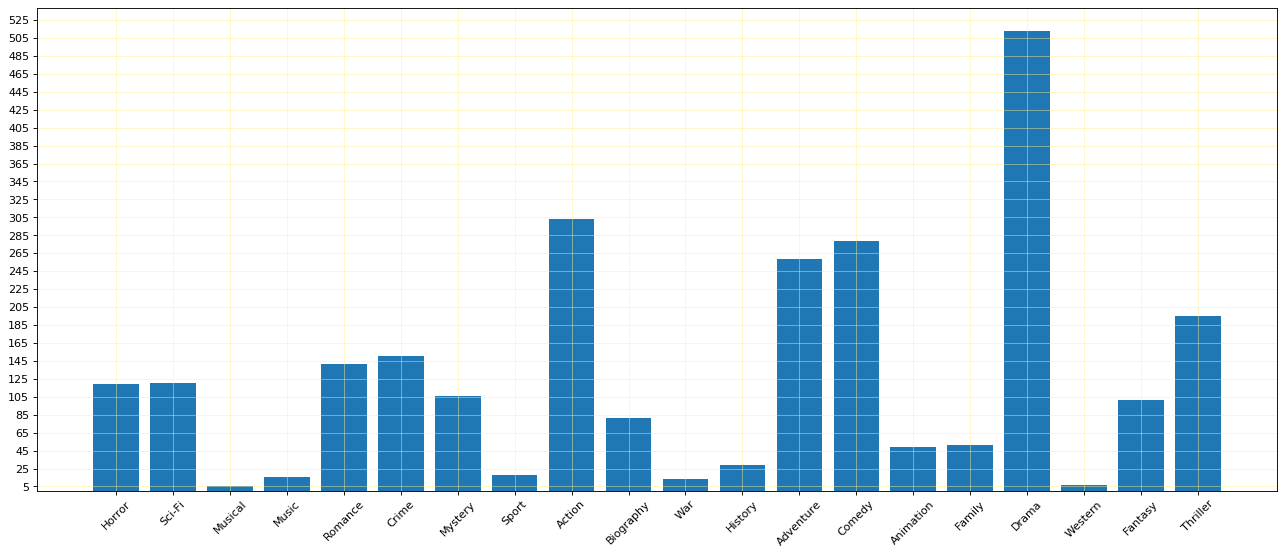

In [7]:
# 就每一个分类的数量和
genre_count = zeros_df.sum(axis=0)   # 对每一列求和 
count = list(genre_count)         # 因为genre_count是serise类型的，所以在面对series类型时，则会将数据转换为列表
print(count)
# print(genre_count)
_x = [i for i in range(len(count))]
plt.figure(figsize=(20,8), dpi=80)# 设置图片大小
plt.bar(_x, count)                     # 画图
plt.xticks(_x, list(zeros_df), rotation=45) # 设置x轴标签
plt.grid(alpha=0.5, color="#FFEC8B")        # 设置网状线
# 设置y轴标签
_y = [i for i in range(int(min(count)), int(max(count))+20, 20)]
plt.yticks(_y)

([<matplotlib.axis.XTick at 0x181535bb188>,
 <a list of 20 Text xticklabel objects>)

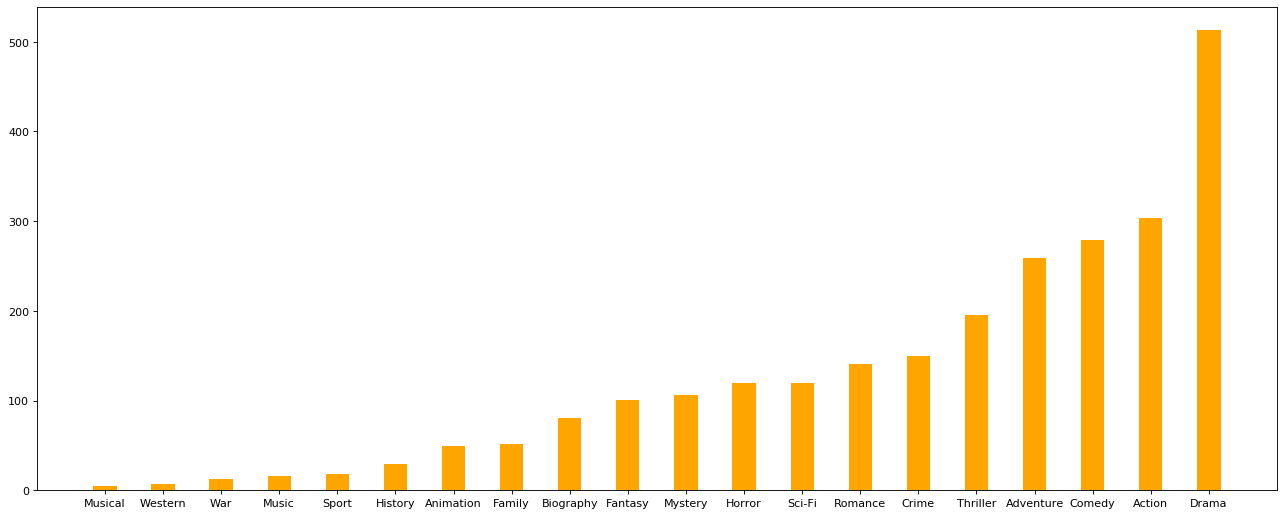

In [8]:
genre_count = genre_count.sort_values()
_x = genre_count.index                         # 通过.index取标签也是挺好的方案
_y = genre_count.values
#画图
plt.figure(figsize=(20,8),dpi=80)
plt.bar(range(len(_x)),_y,width=0.4,color="orange")
plt.xticks(range(len(_x)),_x)      # 设置x轴标签